<a href="https://colab.research.google.com/github/PRAVITH10HJ/Projects-of-ML/blob/main/EDA_for_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA of Flipkart_Drone


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/flipkart_drone.csv")
df.head()

,Name,Type,Control Range,Battery Type,Weight,Price,Actual Price,Discount (%)
0,"Zyamalox ZX drone with camera 4k ,12 MP ,fly 3...",Mini Drone,40,Lithium Battery,200,2297.0,4999.0,54.0
1,Fitpro M3 Ultra Beginner Drone 2.4G Mini FPV H...,Mini Drone,300,AA Battery,500,10255.0,11000.0,6.0
2,Clubmall E88 Pro 4K Camera Drone with WiFi FPV...,Professional Drone,102,AA Rechargeable Battery,150,1994.0,5999.0,66.0
3,Orivox A17 Aerial Drone with 4K Dual Camera - ...,Mini Drone,50,Lithium Battery,150,2455.0,4999.0,50.0
4,Orivox M3 Max Mini Drone with Pro Features HD ...,Mini Drone,200,Lithium Battery,200,4998.0,5999.0,16.0


In [ ]:
df.shape
print("\n")
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           821 non-null    object 
 1   Type           821 non-null    object 
 2   Control Range  821 non-null    int64  
 3   Battery Type   821 non-null    object 
 4   Weight         821 non-null    int64  
 5   Price          813 non-null    float64
 6   Actual Price   813 non-null    float64
 7   Discount (%)   810 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 51.4+ KB


In [ ]:
df.describe()

,Control Range,Weight,Price,Actual Price,Discount (%)
count,821.000000,821.000000,813.000000,813.000000,810.000000
mean,97.193666,3497.157125,2981.785978,8719.712177,63.897531
std,352.827955,38551.303866,1624.738407,2931.414147,13.395685
min,0.000000,0.000000,630.000000,1000.000000,4.000000
25%,60.000000,230.000000,2447.000000,6999.000000,59.000000
50%,65.000000,250.000000,2705.000000,8999.000000,69.000000
75%,100.000000,330.000000,2705.000000,8999.000000,70.000000
max,10028.000000,780000.000000,19999.000000,29999.000000,89.000000


In [ ]:
dups=df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df.drop_duplicates(inplace=True)

Number of duplicate rows = 3


Outliers Check and Treatment

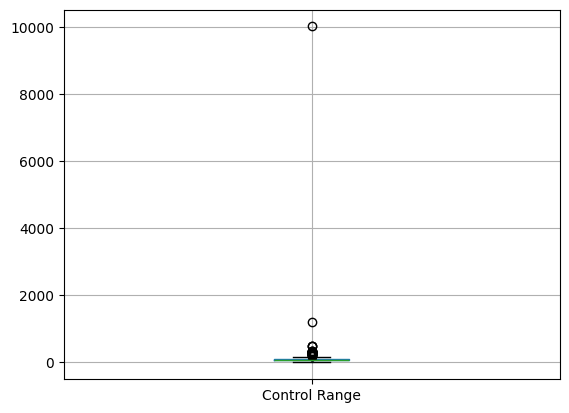

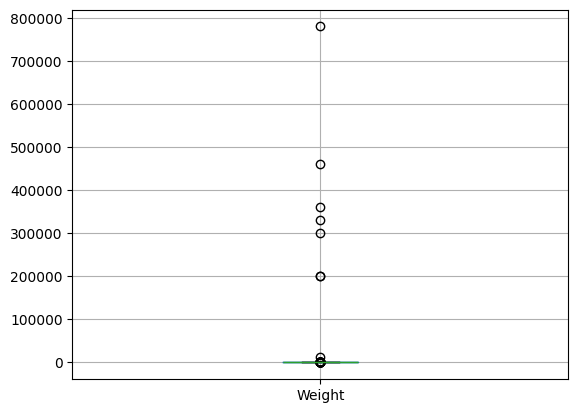

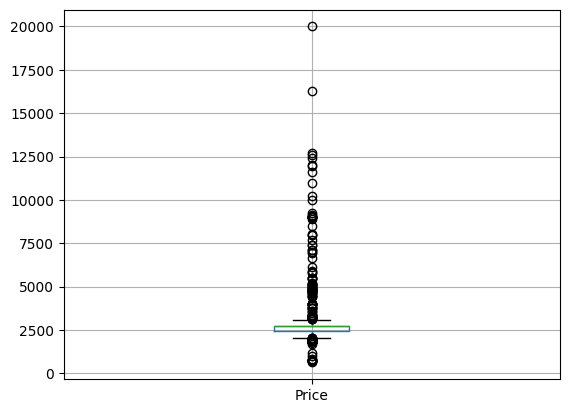

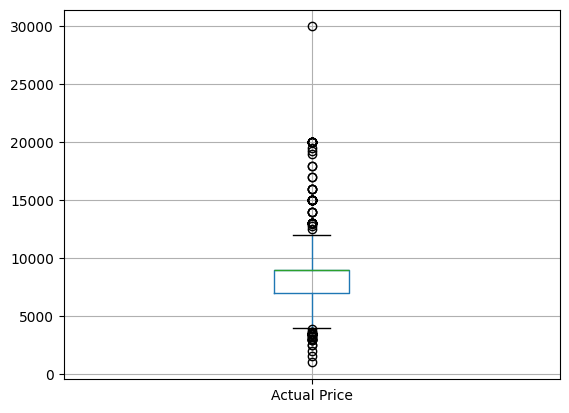

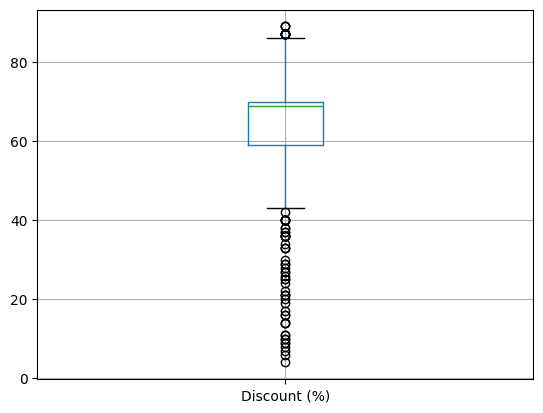

In [ ]:
df.boxplot(column=['Control Range'])
plt.show()
df.boxplot(column=['Weight'])
plt.show()
df.boxplot(column=['Price'])
plt.show()
df.boxplot(column=['Actual Price'])
plt.show()
df.boxplot(column=['Discount (%)'])
plt.show()



Treatment Equation

In [ ]:
def remove_outliers(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower=Q1-(1.5*IQR)
  upper=Q3+(1.5*IQR)
  return lower,upper

In [ ]:
lr_C,ur_C=remove_outliers(df['Control Range'])
lr_W,ur_W=remove_outliers(df['Weight'])
lr_P,ur_P=remove_outliers(df['Price'])
lr_AP,ur_AP=remove_outliers(df['Actual Price'])
lr_D,ur_D=remove_outliers(df['Discount (%)'])
df["Control Range"]=np.where(df["Control Range"]>ur_C,ur_C,df["Control Range"])
df["Control Range"]=np.where(df["Control Range"]<lr_C,lr_C,df["Control Range"])
df["Weight"]=np.where(df["Weight"]>ur_W,ur_W,df["Weight"])
df["Weight"]=np.where(df["Weight"]<lr_W,lr_W,df["Weight"])
df["Price"]=np.where(df["Price"]>ur_P,ur_P,df["Price"])
df["Price"]=np.where(df["Price"]<lr_P,lr_P,df["Price"])
df["Actual Price"]=np.where(df["Actual Price"]>ur_AP,ur_AP,df["Actual Price"])
df["Actual Price"]=np.where(df["Actual Price"]<lr_AP,lr_AP,df["Actual Price"])
df["Discount (%)"]=np.where(df["Discount (%)"]>ur_D,ur_D,df["Discount (%)"])
df["Discount (%)"]=np.where(df["Discount (%)"]<lr_D,lr_D,df["Discount (%)"])
print(df["Control Range"],df["Weight"],df["Price"],df["Actual Price"],df["Discount (%)"])

0       40.0
1      160.0
2      102.0
3       50.0
4      160.0
       ...  
816     60.0
817    100.0
818    102.0
819     60.0
820    100.0
Name: Control Range, Length: 818, dtype: float64 0      200.0
1      493.5
2      150.0
3      150.0
4      200.0
       ...  
816    250.0
817    350.0
818    400.0
819    250.0
820    300.0
Name: Weight, Length: 818, dtype: float64 0      2297.0
1      3092.0
2      2060.0
3      2455.0
4      3092.0
        ...  
816    2244.0
817    2447.0
818    2060.0
819    2799.0
820    2705.0
Name: Price, Length: 818, dtype: float64 0       4999.0
1      11000.0
2       5999.0
3       4999.0
4       5999.0
        ...   
816     8999.0
817     4999.0
818     6999.0
819     5999.0
820     8999.0
Name: Actual Price, Length: 818, dtype: float64 0      54.0
1      42.5
2      66.0
3      50.0
4      42.5
       ... 
816    75.0
817    51.0
818    74.0
819    53.0
820    69.0
Name: Discount (%), Length: 818, dtype: float64


Checking for  outliers again

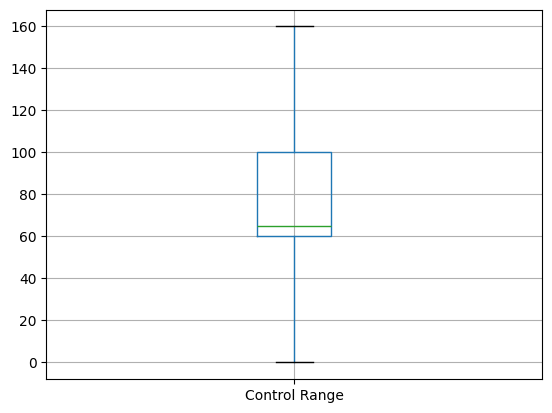

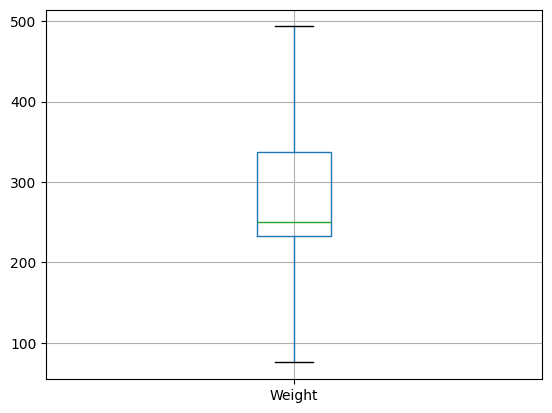

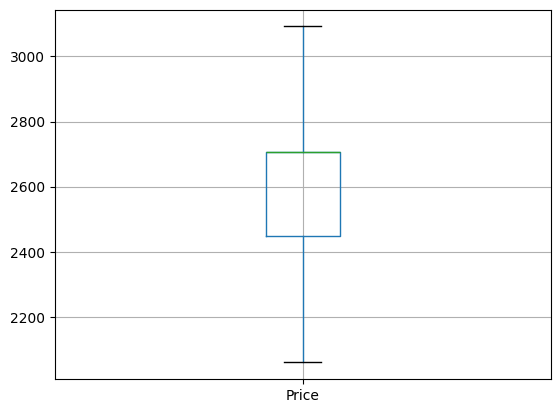

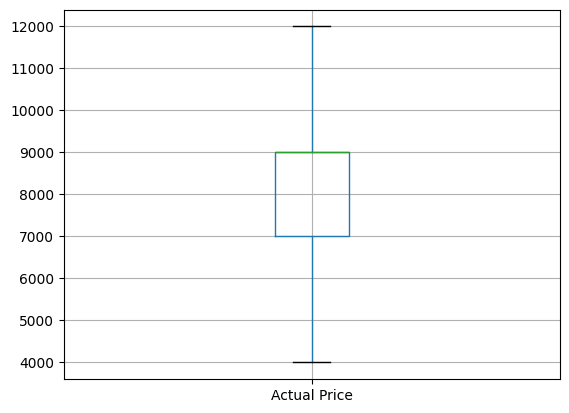

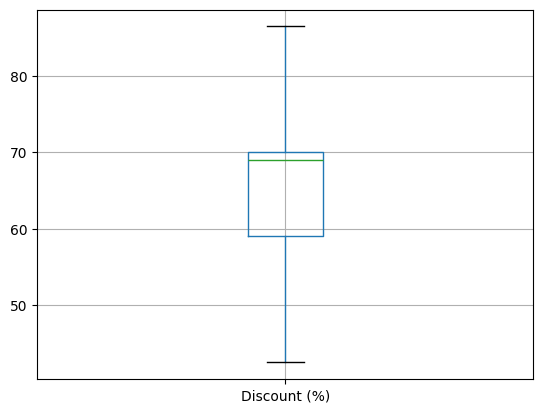

In [ ]:
df.boxplot(column=['Control Range'])
plt.show()
df.boxplot(column=['Weight'])
plt.show()
df.boxplot(column=['Price'])
plt.show()
df.boxplot(column=['Actual Price'])
plt.show()
df.boxplot(column=['Discount (%)'])
plt.show()

checking for NULL values

In [ ]:
df.isnull().sum()

,0
Name,0
Type,0
Control Range,0
Battery Type,0
Weight,0
Price,8
Actual Price,8
Discount (%),11


Removing the null values  

numerical+outlier=use median

numerical+withoutouliers=mean  

catgorical=mode





In [ ]:
med=df["Price"].median()
med2=df['Actual Price'].median()
medf3=df['Discount (%)'].median()
df['Price'].replace(np.nan,med,inplace=True)
df['Actual Price'].replace(np.nan,med2,inplace=True)
df['Discount (%)'].replace(np.nan,medf3,inplace=True)
df.isnull().sum()

/tmp/ipython-input-4244288547.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].replace(np.nan,med,inplace=True)
/tmp/ipython-input-4244288547.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

,0
Name,0
Type,0
Control Range,0
Battery Type,0
Weight,0
Price,0
Actual Price,0
Discount (%),0


Univariate analysis

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


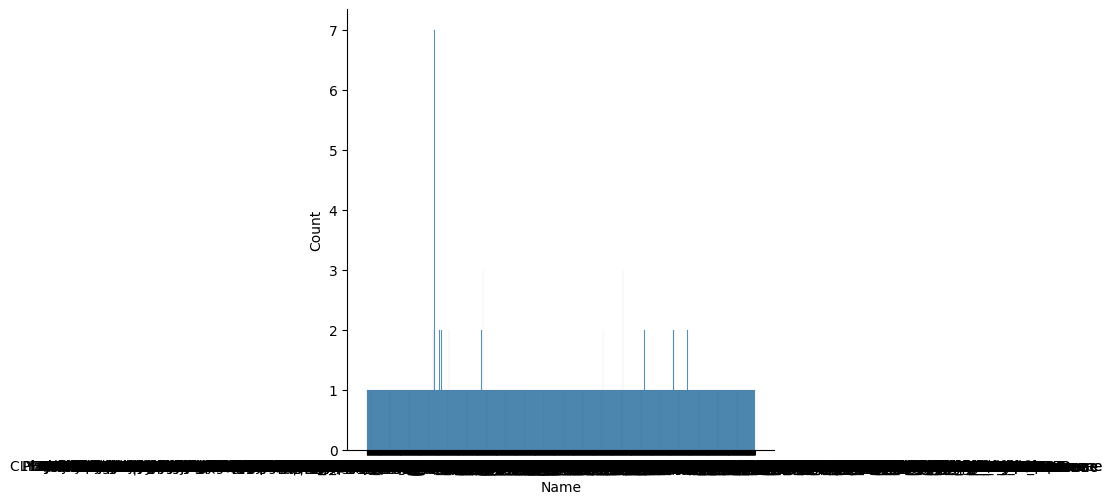

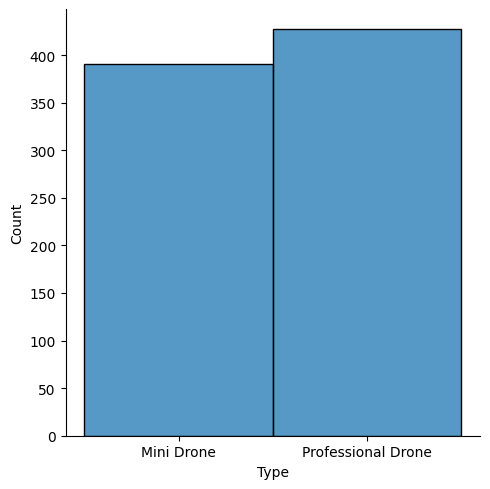

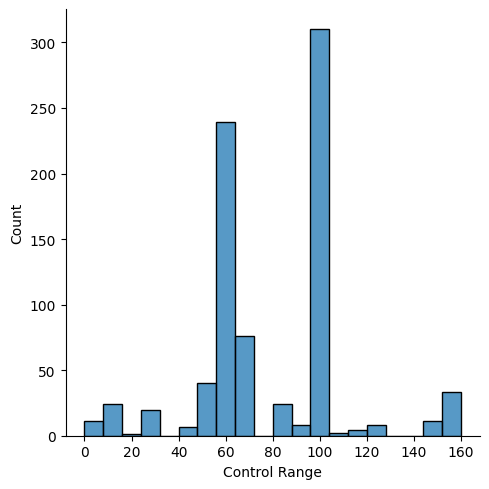

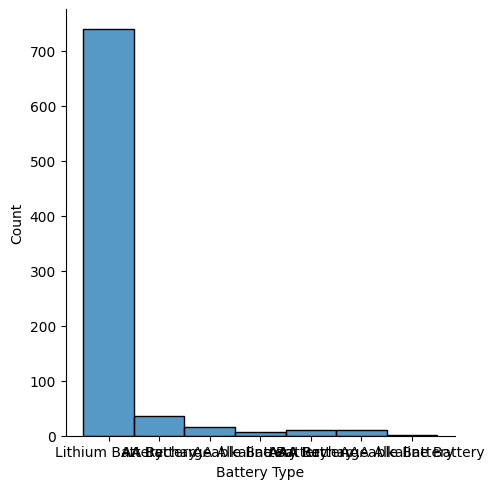

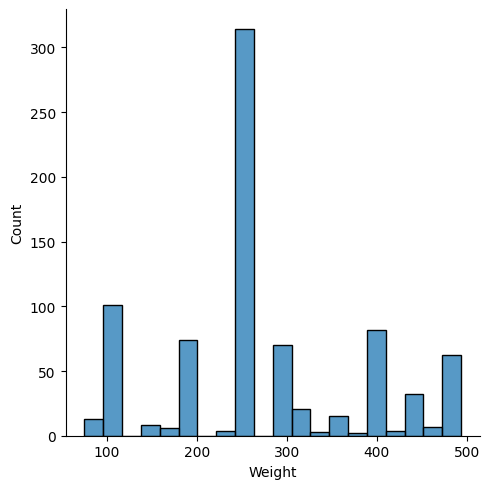

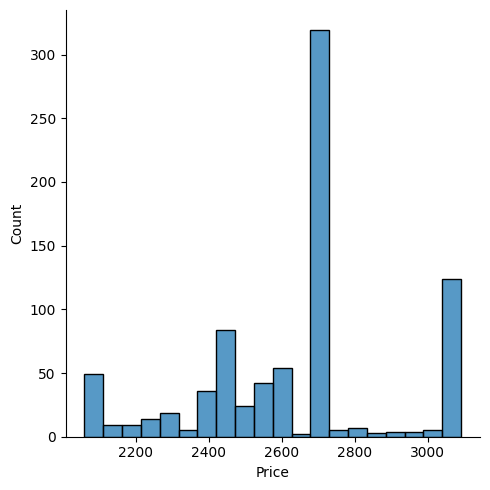

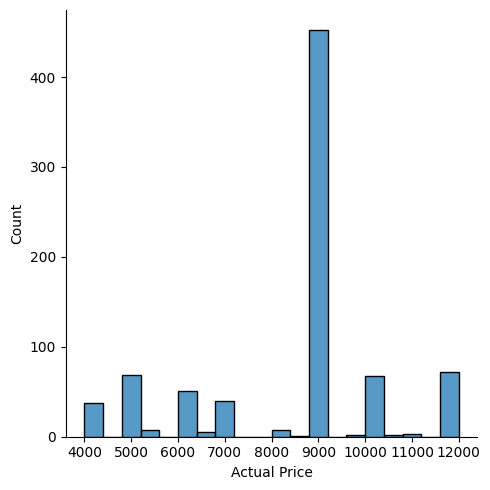

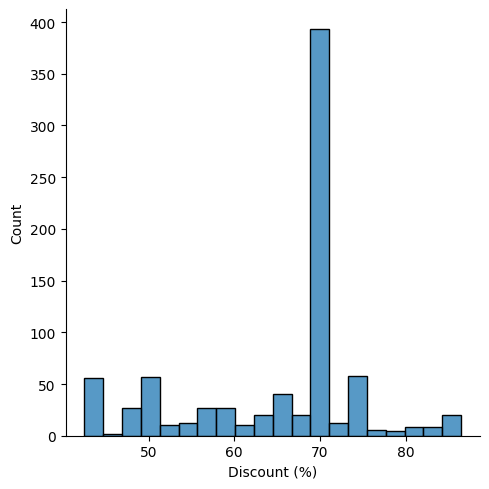

In [ ]:
for col in (df.columns):
  sns.displot(df[col],bins=20)


Bivariate Analysis

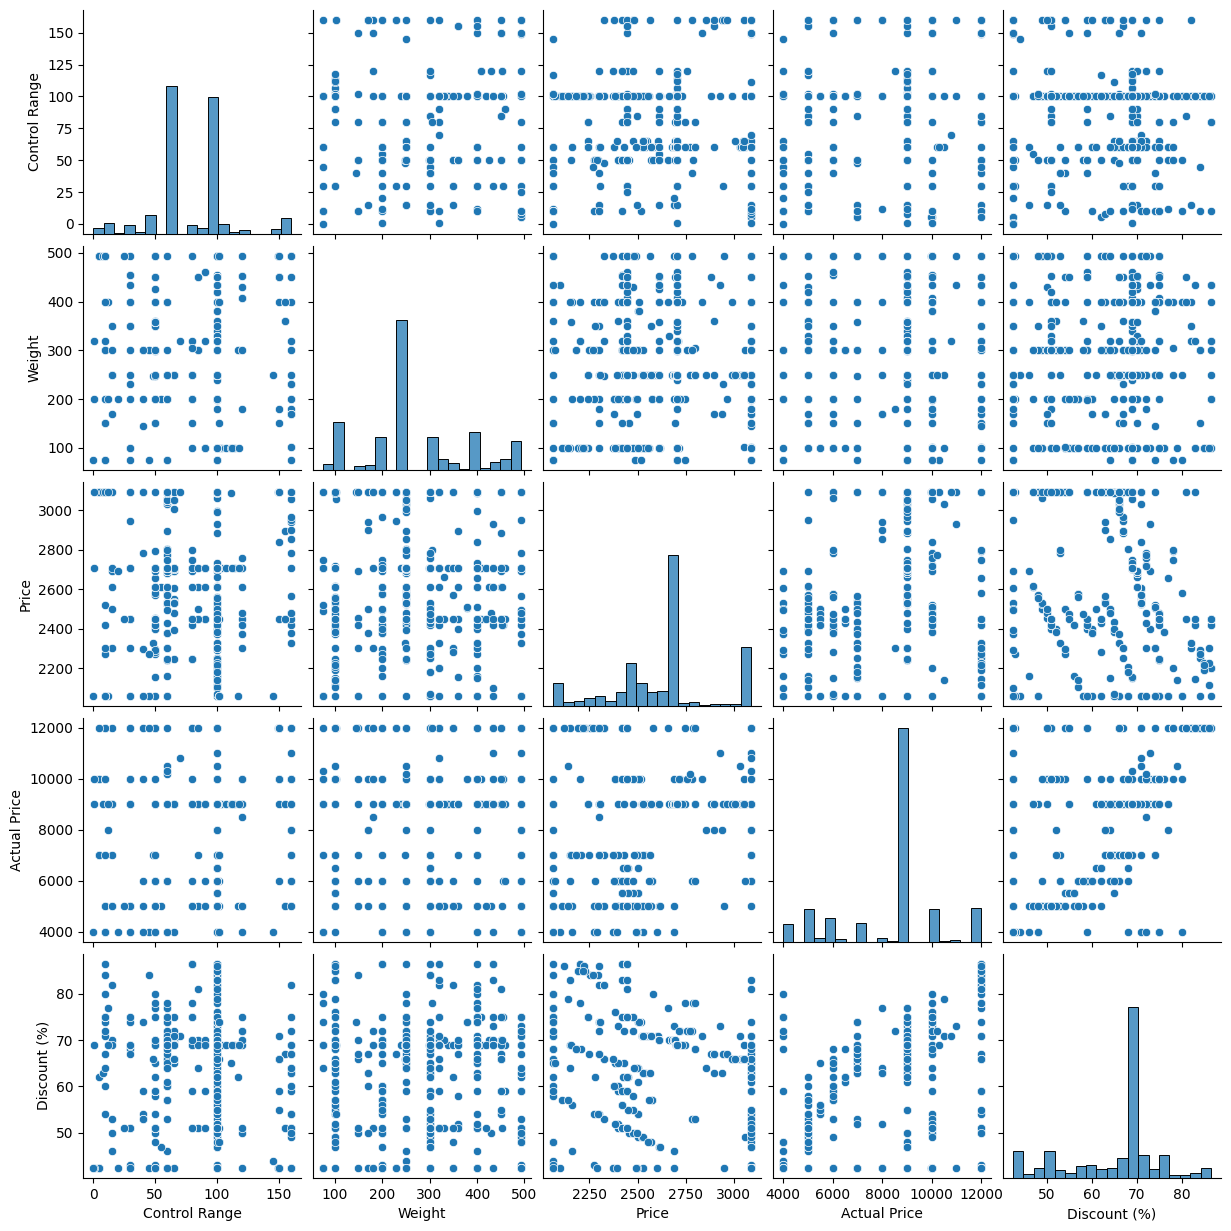

In [ ]:
sns.pairplot(df)
plt.show()

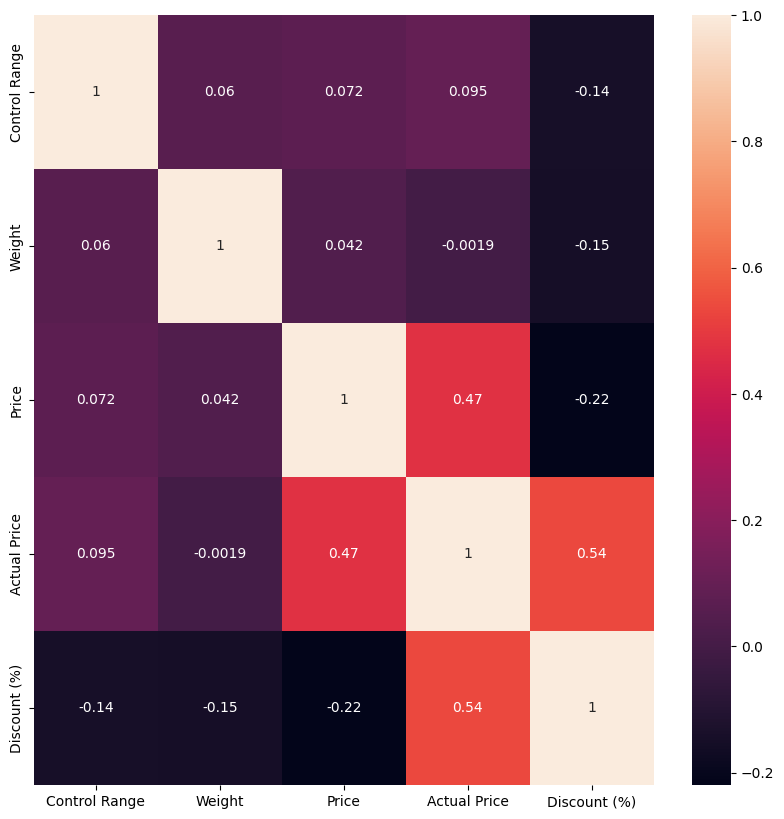

In [ ]:
df_numeric = df.select_dtypes(include=np.number)
df_numeric.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_numeric.corr(),annot=True)
plt.show()

Noramlization and scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scale=StandardScaler()
df['Control Range']=std_scale.fit_transform(df[['Control Range']])
df['Weight']=std_scale.fit_transform(df[['Weight']])
df['Price']=std_scale.fit_transform(df[['Price']])
df['Actual Price']=std_scale.fit_transform(df[['Actual Price']])
df['Discount (%)']=std_scale.fit_transform(df[['Discount (%)']])
df.head()

,Name,Type,Control Range,Battery Type,Weight,Price,Actual Price,Discount (%)
0,"Zyamalox ZX drone with camera 4k ,12 MP ,fly 3...",Mini Drone,-1.254334,Lithium Battery,-0.671877,-1.258248,-1.717200,-1.092126
1,Fitpro M3 Ultra Beginner Drone 2.4G Mini FPV H...,Mini Drone,2.588293,AA Battery,1.968398,1.693000,1.273821,-2.231930
2,Clubmall E88 Pro 4K Camera Drone with WiFi FPV...,Professional Drone,0.731023,AA Rechargeable Battery,-1.121669,-2.138054,-1.218780,0.097235
3,Orivox A17 Aerial Drone with 4K Dual Camera - ...,Mini Drone,-0.934116,Lithium Battery,-1.121669,-0.671711,-1.717200,-1.488579
4,Orivox M3 Max Mini Drone with Pro Features HD ...,Mini Drone,2.588293,Lithium Battery,-0.671877,1.693000,-1.218780,-2.231930


Encoding

In [ ]:
dummies=pd.get_dummies(df[['Name','Type','Battery Type']],columns=['Name','Type','Battery Type'],prefix=['name','type','batter type'])


In [ ]:
columns=['Name','Type','Battery Type']
df.drop(columns,axis=1,inplace=True)
df=pd.concat([df,dummies],axis=1)
df.head()

,Control Range,Weight,Price,Actual Price,Discount (%),name_Antman E88 WiFi Remote Control Drone Dual Camera Drone 720p Video 2 Batteries Drone,name_Antman E88| E88 Pro Drone With HD 4K Dual Camera Hold RC Foldable Quadcopter Drone Drone,"name_Antman E99 with Dual Battery, Dual Camera, HD Video Drone",name_Antman Pro Drone,name_Barbie Blue Quadcopter Drone_14b Drone,...,name_xelix E88 Drone,type_Mini Drone,type_Professional Drone,batter type_AA Alkaline Battery,batter type_AA Battery,batter type_AA Rechargeable Battery,batter type_AAA Alkaline Battery,batter type_AAA Battery,batter type_AAA Rechargeable Battery,batter type_Lithium Battery
0,-1.254334,-0.671877,-1.258248,-1.717200,-1.092126,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,2.588293,1.968398,1.693000,1.273821,-2.231930,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
2,0.731023,-1.121669,-2.138054,-1.218780,0.097235,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
3,-0.934116,-1.121669,-0.671711,-1.717200,-1.488579,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
4,2.588293,-0.671877,1.693000,-1.218780,-2.231930,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
